In [46]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [47]:
# Load the data
data = pd.read_csv('WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL_ESTIMATES.csv', sep=',',skiprows=16, header=0)

C:\Users\qadee\AppData\Local\Temp\ipykernel_24512\145896758.py:2: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL_ESTIMATES.csv', sep=',',skiprows=16, header=0)


In [48]:
# Print out the top 5 rows of data
data.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,581,497,239,269,208,375,426,323,0,0
1,2,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,567,488,230,256,203,365,413,316,0,0
2,3,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,546,475,217,239,196,351,393,307,0,0
3,4,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,536,467,211,231,191,343,384,301,0,0
4,5,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,522,456,203,221,185,332,372,293,0,0


In [49]:
# Filter by type Subregion
region_data = data[data['Type'] == 'Subregion']

region_data.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
2520,2521,Estimates,Eastern Africa,NaN,910,NaN,NaN,14.0,Subregion,903,...,689,617,323,353,292,461,503,417,- 57,-0.9
2521,2522,Estimates,Eastern Africa,NaN,910,NaN,NaN,14.0,Subregion,903,...,684,612,321,350,290,458,499,415,- 57,-0.8
2522,2523,Estimates,Eastern Africa,NaN,910,NaN,NaN,14.0,Subregion,903,...,680,606,319,349,287,456,498,411,- 71,-1.0
2523,2524,Estimates,Eastern Africa,NaN,910,NaN,NaN,14.0,Subregion,903,...,675,600,316,346,285,453,495,408,- 102,-1.4
2524,2525,Estimates,Eastern Africa,NaN,910,NaN,NaN,14.0,Subregion,903,...,669,594,313,343,281,449,492,404,- 96,-1.3


In [50]:
# Selectb the column hat I will be using for the creation of the graph
choosen_column = ['Region, subregion, country or area *', 'Year', 'Births (thousands)', 'Total Deaths (thousands)']
region_data = region_data[choosen_column]

region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands)
2520,Eastern Africa,1950.0,3 174,1 708
2521,Eastern Africa,1951.0,3 253,1 710
2522,Eastern Africa,1952.0,3 337,1 719
2523,Eastern Africa,1953.0,3 422,1 730
2524,Eastern Africa,1954.0,3 504,1 742


In [51]:
# Clean any of the numeric columns so remove spaces and commas
# As i did have a problem where it would ignore number like 10 000
region_data['Births (thousands)'] = region_data['Births (thousands)'].replace(',', '').replace(' ', '', regex=True).str.strip()
region_data['Total Deaths (thousands)'] = region_data['Total Deaths (thousands)'].replace(',', '').replace(' ', '', regex=True).str.strip()

In [52]:
# Print the data
region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands)
2520,Eastern Africa,1950.0,3174,1708
2521,Eastern Africa,1951.0,3253,1710
2522,Eastern Africa,1952.0,3337,1719
2523,Eastern Africa,1953.0,3422,1730
2524,Eastern Africa,1954.0,3504,1742


In [53]:
# Now here I am converting the columns to numeric ad handling any errors it has by converting them to Nan values
region_data['Births (thousands)'] = pd.to_numeric(region_data['Births (thousands)'], errors='coerce')
region_data['Total Deaths (thousands)'] = pd.to_numeric(region_data['Total Deaths (thousands)'], errors='coerce')

In [54]:
# Again print the data here
region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands)
2520,Eastern Africa,1950.0,3174,1708
2521,Eastern Africa,1951.0,3253,1710
2522,Eastern Africa,1952.0,3337,1719
2523,Eastern Africa,1953.0,3422,1730
2524,Eastern Africa,1954.0,3504,1742


In [55]:
# alcuate the Birth to Death ratio by dividing them for example the Birth rate is 12000 and the death rate is 4000 meaning the ratio equals to 3 so for every death there are 3 births 
region_data['Births-to-Deaths Ratio'] = region_data['Births (thousands)'] / region_data['Total Deaths (thousands)']

In [56]:
# Print out the data again aswell as a column which 
region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands),Births-to-Deaths Ratio
2520,Eastern Africa,1950.0,3174,1708,1.858314
2521,Eastern Africa,1951.0,3253,1710,1.902339
2522,Eastern Africa,1952.0,3337,1719,1.941245
2523,Eastern Africa,1953.0,3422,1730,1.978035
2524,Eastern Africa,1954.0,3504,1742,2.011481


In [57]:
# Drop any Nan values
cleaned_data = region_data.dropna(subset=['Births-to-Deaths Ratio'])

In [58]:
# Print the cleaned data 
cleaned_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands),Births-to-Deaths Ratio
2520,Eastern Africa,1950.0,3174,1708,1.858314
2521,Eastern Africa,1951.0,3253,1710,1.902339
2522,Eastern Africa,1952.0,3337,1719,1.941245
2523,Eastern Africa,1953.0,3422,1730,1.978035
2524,Eastern Africa,1954.0,3504,1742,2.011481


In [59]:
# Setting colour for the plotted dots
colors = plt.cm.rainbow(np.linspace(0, 1, len(cleaned_data['Region, subregion, country or area *'].unique())))

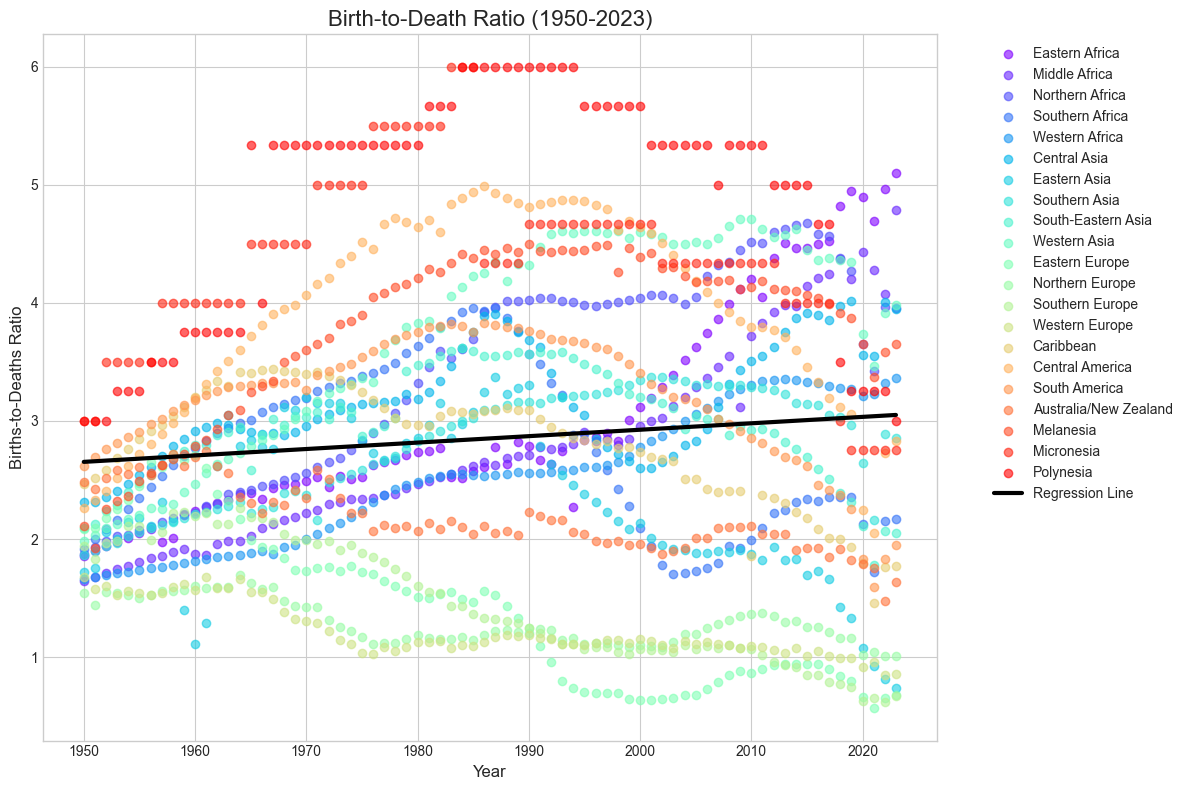

In [60]:
plt.figure(figsize=(12, 8))
# Loop through each regiohn to plot there data
for i, region in enumerate(cleaned_data['Region, subregion, country or area *'].unique()):
    # Filter the data for each region
    region_subset = cleaned_data[cleaned_data['Region, subregion, country or area *'] == region]
    # Create a scatter plot each region usng colour and label
    plt.scatter(region_subset['Year'], region_subset['Births-to-Deaths Ratio'], color=colors[i], label=region, alpha=0.6)

# Prepare the data for linear regrsson model
model = LinearRegression()
# The X value on the groah ius the Year
X = cleaned_data['Year'].values.reshape(-1, 1) 
# The Y value on the graph is the Birth to Death ratio
y = cleaned_data['Births-to-Deaths Ratio'].values
# Fit the linear regrssin model to the data 
model.fit(X, y)

# Predict the Birth to deathj ratio across the years 
y_prediction = model.predict(np.array(sorted(cleaned_data['Year'].unique())).reshape(-1, 1))

# Plot the reegression line using the predicted values
plt.plot(sorted(cleaned_data['Year'].unique()), y_prediction, color='black', linewidth=3, label='Regression Line')

# The title ad the axis labels and a legend to the plot 
plt.title('Birth-to-Death Ratio (1950-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Births-to-Deaths Ratio', fontsize=12)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), ncol=1)
# Display grid lines
plt.grid(True)
# Adjust all the plot so everything fits with no overlapping
plt.tight_layout()
# Display the plotted table
plt.show()